# Course-End Project: Sales Analysis

# Importing required packages and reading data file and converting it to DataFrame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_excel('C:/Users/JATIN/Desktop/python/Sales analysis data science project/1688639662_ausapparalsales4thqrt2020.xlsx')
df1=pd.DataFrame(df)
df1

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


# Checking the statistical description of data

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [3]:
df1.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


# 1. Data Wrangling: checking for missing values and shape of data 

In [4]:
df1.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

# Their are no null values in the dataset. So further we will check for outliers in the dataset and checking the shape of the dataset by kde plot by importing Seaborn package

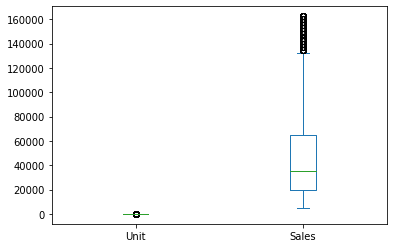

In [5]:
import seaborn as sns
Boxplot=df1.plot(kind='box')

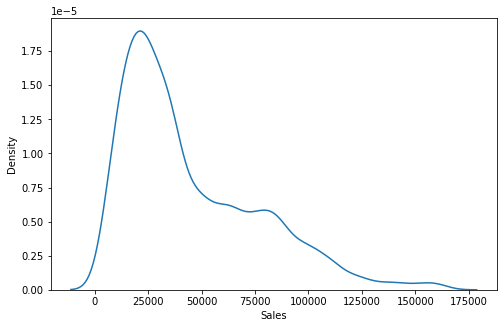

In [6]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df1['Sales'])
plt.show()


# The shown above KDE plot shows the data has skewness

In [7]:
df1['Sales'].describe()


count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

In [8]:
import datetime as datetime
df1['Month']=df1['Date'].dt.month_name()
df1

,Date,Time,State,Group,Unit,Sales,Month
0,2020-10-01,Morning,WA,Kids,8,20000,October
1,2020-10-01,Morning,WA,Men,8,20000,October
2,2020-10-01,Morning,WA,Women,4,10000,October
3,2020-10-01,Morning,WA,Seniors,15,37500,October
4,2020-10-01,Afternoon,WA,Kids,3,7500,October
...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,December
7556,2020-12-30,Evening,TAS,Kids,15,37500,December
7557,2020-12-30,Evening,TAS,Men,15,37500,December
7558,2020-12-30,Evening,TAS,Women,11,27500,December


In [9]:
df1['Month'].unique()

array(['October', 'November', 'December'], dtype=object)

In [10]:
group_data=df1.groupby(['Month','Sales']).size()
group_data

Month     Sales 
December  12500      92
          15000      96
          17500      96
          20000     112
          22500     134
                   ... 
October   115000     12
          117500     11
          120000     11
          122500     14
          125000     16
Length: 153, dtype: int64

# The above data shows December Month has unusual number of Sales 

# Now we will encode the month, Group, State, Time using sklearn package

In [11]:
import sklearn
sklearn.set_config(transform_output="pandas")


In [12]:
# Label Encoding : ordinal 
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
df1['Month_encode']=lb.fit_transform(df1.Month)


In [13]:
df1['Time_encode']=lb.fit_transform(df1.Time)
df1['State_encode']=lb.fit_transform(df1.State)
df1['Group_encode']=lb.fit_transform(df1.Group)

In [14]:
df1

,Date,Time,State,Group,Unit,Sales,Month,Month_encode,Time_encode,State_encode,Group_encode
0,2020-10-01,Morning,WA,Kids,8,20000,October,2,2,6,0
1,2020-10-01,Morning,WA,Men,8,20000,October,2,2,6,1
2,2020-10-01,Morning,WA,Women,4,10000,October,2,2,6,3
3,2020-10-01,Morning,WA,Seniors,15,37500,October,2,2,6,2
4,2020-10-01,Afternoon,WA,Kids,3,7500,October,2,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,December,0,0,4,2
7556,2020-12-30,Evening,TAS,Kids,15,37500,December,0,1,4,0
7557,2020-12-30,Evening,TAS,Men,15,37500,December,0,1,4,1
7558,2020-12-30,Evening,TAS,Women,11,27500,December,0,1,4,3


# Monthwise sales analysis('month_number october- 2, December - 0, November - 1')

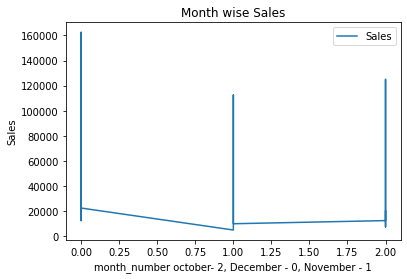

In [15]:
plt.Figure(figsize=(15,10))
df1.plot.line(x='Month_encode',y='Sales')
plt.xlabel('month_number october- 2, December - 0, November - 1')
plt.ylabel('Sales')
plt.title('Month wise Sales')
plt.show()

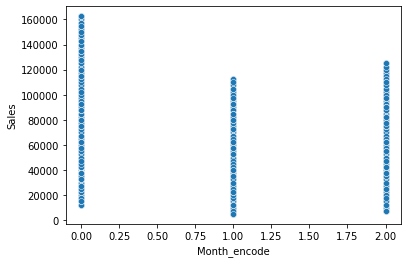

In [16]:
import seaborn as sns
sns.scatterplot(x=df1['Month_encode'],y=df1['Sales'])
plt.show()

In [17]:
df1

,Date,Time,State,Group,Unit,Sales,Month,Month_encode,Time_encode,State_encode,Group_encode
0,2020-10-01,Morning,WA,Kids,8,20000,October,2,2,6,0
1,2020-10-01,Morning,WA,Men,8,20000,October,2,2,6,1
2,2020-10-01,Morning,WA,Women,4,10000,October,2,2,6,3
3,2020-10-01,Morning,WA,Seniors,15,37500,October,2,2,6,2
4,2020-10-01,Afternoon,WA,Kids,3,7500,October,2,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,December,0,0,4,2
7556,2020-12-30,Evening,TAS,Kids,15,37500,December,0,1,4,0
7557,2020-12-30,Evening,TAS,Men,15,37500,December,0,1,4,1
7558,2020-12-30,Evening,TAS,Women,11,27500,December,0,1,4,3


# Clearly VIC state is generating highest sales

In [18]:
group_state=df1[['State','Sales']].groupby(['State']).sum().sort_values(['Sales'],ascending=False)
group_state

,Sales
State,
VIC,105565000
NSW,74970000
SA,58857500
QLD,33417500
TAS,22760000
NT,22580000
WA,22152500


# From the shown below graph it is clear VIC state has highest Sales

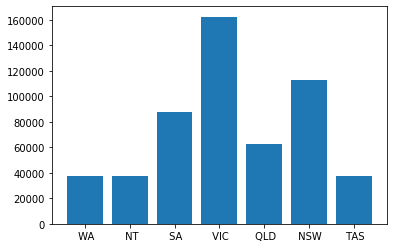

In [47]:
plt.bar(df1['State'],df1['Sales'])
plt.show()

# Group encode - Kids: 0, Men : 1, women 3, Seniors :2

In [20]:
df1['Group_encode'].unique()  # Kids: 0, Men : 1, women 3, Seniors :2

array([0, 1, 3, 2])

# Groupwise Sales analysis

In [21]:
group_Sales=df1[['Group','Sales']].groupby(['Group']).sum().sort_values(by='Sales',ascending=False)
group_Sales

,Sales
Group,
Men,85750000
Women,85442500
Kids,85072500
Seniors,84037500


# Men has the highest sales 

<Figure size 1440x1080 with 0 Axes>

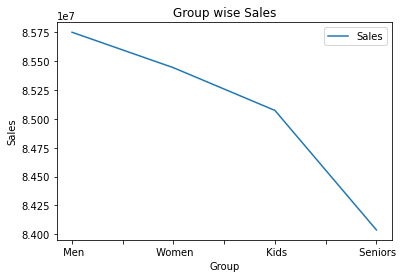

In [22]:
plt.figure(figsize=(20,15))
group_Sales.plot.line()
plt.xlabel('Group')
plt.ylabel('Sales')
plt.title('Group wise Sales')
plt.show()
#Men has higher Sales 

# Men has the highest Sales in all of the group

In [23]:
df1

,Date,Time,State,Group,Unit,Sales,Month,Month_encode,Time_encode,State_encode,Group_encode
0,2020-10-01,Morning,WA,Kids,8,20000,October,2,2,6,0
1,2020-10-01,Morning,WA,Men,8,20000,October,2,2,6,1
2,2020-10-01,Morning,WA,Women,4,10000,October,2,2,6,3
3,2020-10-01,Morning,WA,Seniors,15,37500,October,2,2,6,2
4,2020-10-01,Afternoon,WA,Kids,3,7500,October,2,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,December,0,0,4,2
7556,2020-12-30,Evening,TAS,Kids,15,37500,December,0,1,4,0
7557,2020-12-30,Evening,TAS,Men,15,37500,December,0,1,4,1
7558,2020-12-30,Evening,TAS,Women,11,27500,December,0,1,4,3


# Time - Sales analysis

In [24]:
df1_time=df1[['Time','Sales']].groupby('Time').sum()
df1_time

,Sales
Time,
Afternoon,114007500
Evening,112087500
Morning,114207500


# Time_analysis shows Morning has the highest Sales

In [25]:
time_analysis=pd.pivot_table(df1_time,values='Sales',index='Time',aggfunc=np.sum)
time_analysis.sort_values(by='Sales',ascending=False)
#Time_analysis shows Morning has the highest Sales

,Sales
Time,
Morning,114207500
Afternoon,114007500
Evening,112087500


The Following line plot shows Morning has the highest Sales

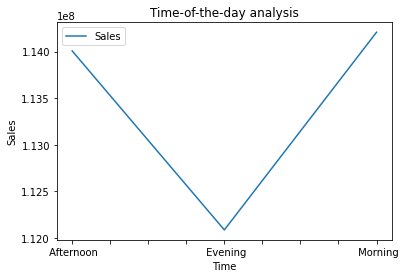

In [26]:
time_analysis.plot.line()
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Time-of-the-day analysis')
plt.show()
# The Following line plot shows Morning has the highest Sales

In [27]:
df1['Unit'].unique()

array([ 8,  4, 15,  3, 10, 11, 13,  5,  6,  9, 14, 12, 16, 28, 21, 29, 22,
       32, 49, 36, 34, 26, 31, 27, 43, 50, 44, 20, 18, 19, 39, 17, 23, 40,
       30,  7, 33, 42, 46, 48, 37, 25, 35, 45, 47, 38, 41, 24,  2, 51, 63,
       62, 52, 56, 59, 64, 53, 61, 54, 60, 55, 65, 57, 58], dtype=int64)

# Group wise unit analysis

In [28]:
df1_unit=df1[['Group','Unit']].groupby(by='Group').sum().sort_values(by='Unit',ascending=False)
df1_unit

,Unit
Group,
Men,34300
Women,34177
Kids,34029
Seniors,33615


<Figure size 720x360 with 0 Axes>

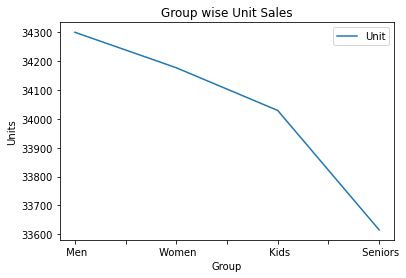

In [29]:
plt.figure(figsize=(10,5))
df1_unit.plot.line()
plt.xlabel('Group')
plt.ylabel('Units')
plt.title('Group wise Unit Sales')
plt.show()

# The following Line graph shows Men purchase more units